In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 3 CSV files were scraped for same durations from NYC to 3 different destinations

In [2]:
#put all into one dataframe
df1 = pd.read_csv('./data/kayak.csv') # csv#1 - scraped from NYC to LAX
df1['location'] = "NYC-LAX"
df2 = pd.read_csv('./data/kayak_2.csv') # csv#2 - scraped from NYC to PER
df2['location'] = "NYC-PER"
df3 = pd.read_csv('./data/kayak_3.csv') # csv#3 - scraped from NYC to BOS
df3["location"] = "NYC-BOS"

df = pd.concat([df1, df2, df3], axis=0)
df.columns = (['price', 'To_#stops', 'From_#stops', 'To_airport_stops', 'From_airport_stops',\
               'To_duration', 'From_duration', 'To_airport', 'From_airport', 'To_time',\
               'From_time','To_carrier', 'From_carrier', 'sort', "location"])
df

,price,To_#stops,From_#stops,To_airport_stops,From_airport_stops,To_duration,From_duration,To_airport,From_airport,To_time,From_time,To_carrier,From_carrier,sort,location
0,$401,0,1,NaN,DTW,5h 49m,6h 54m,EWR ‐ LAX,LAX ‐ LGA,9:00 am — 11:49 am,9:50 pm — 7:44 am +1,United Airlines,Spirit Airlines,best,NYC-LAX
1,$472,0,0,NaN,NaN,5h 45m,5h 00m,EWR ‐ LAX,LAX ‐ EWR,7:00 am — 9:45 am,9:15 pm — 5:15 am +1,United Airlines,United Airlines,best,NYC-LAX
2,$472,0,0,NaN,NaN,5h 45m,5h 01m,EWR ‐ LAX,LAX ‐ EWR,7:00 am — 9:45 am,11:15 pm — 7:16 am +1,United Airlines,United Airlines,best,NYC-LAX
3,$472,0,0,NaN,NaN,5h 49m,5h 00m,EWR ‐ LAX,LAX ‐ EWR,9:00 am — 11:49 am,9:15 pm — 5:15 am +1,United Airlines,United Airlines,best,NYC-LAX
4,$472,0,0,NaN,NaN,5h 49m,5h 01m,EWR ‐ LAX,LAX ‐ EWR,9:00 am — 11:49 am,11:15 pm — 7:16 am +1,United Airlines,United Airlines,best,NYC-LAX
5,$472,0,0,NaN,NaN,5h 59m,5h 00m,EWR ‐ LAX,LAX ‐ EWR,3:00 pm — 5:59 pm,9:15 pm — 5:15 am +1,United Airlines,United Airlines,best,NYC-LAX
6,$472,0,0,NaN,NaN,5h 59m,5h 01m,EWR ‐ LAX,LAX ‐ EWR,4:59 pm — 7:58 pm,11:15 pm — 7:16 am +1,United Airlines,United Airlines,best,NYC-LAX
7,$472,0,0,NaN,NaN,5h 59m,5h 01m,EWR ‐ LAX,LAX ‐ EWR,3:00 pm — 5:59 pm,11:15 pm — 7:16 am +1,United Airlines,United Airlines,best,NYC-LAX
8,$495,0,0,NaN,NaN,5h 49m,5h 33m,EWR ‐ LAX,LAX ‐ JFK,9:00 am — 11:49 am,5:30 am — 2:03 pm,United Airlines,JetBlue,best,NYC-LAX
9,$495,0,0,NaN,NaN,5h 59m,5h 33m,EWR ‐ LAX,LAX ‐ JFK,3:00 pm — 5:59 pm,5:30 am — 2:03 pm,United Airlines,JetBlue,best,NYC-LAX


In [3]:
# quick check of total rows in each of the 3 dfs are properly concatenated
df.loc[df.sort == 'best', 'price'].count()
df.loc[df.sort == 'cheapest', 'price'].count()
df.loc[df.sort == 'quickest', 'price'].count()

2172

In [4]:
# df = df.drop(['src_stops', 'dest_stops', 'src_airport_stops', 'dest_airport_stops'], axis=1)

In [5]:
df.isna().sum()
df.loc[df.price.isna()]
df = df[df['price'].notnull()]
df.count()

price                 6872
To_#stops             6872
From_#stops           6872
To_airport_stops      2561
From_airport_stops    3111
To_duration           6872
From_duration         6872
To_airport            6872
From_airport          6872
To_time               6872
From_time             6872
To_carrier            6872
From_carrier          6872
sort                  6872
location              6872
dtype: int64

In [6]:
# remove $ and convert price column to integer
df.price = df.price.str.replace("$", "")
df.price = list(map(int, df.price))
df.dtypes

price                  int64
To_#stops              int64
From_#stops            int64
To_airport_stops      object
From_airport_stops    object
To_duration           object
From_duration         object
To_airport            object
From_airport          object
To_time               object
From_time             object
To_carrier            object
From_carrier          object
sort                  object
location              object
dtype: object

In [7]:
# To_duration - convert to minutes
values = df.To_duration.str.split(' ', expand = True)
values[0] = values.loc[:, 0].str.replace('h', '')
values[1] = values.loc[:, 1].str.replace('m', '')
values = values.astype(int)
df['To_mins'] = values[0]*60 + values[1]

In [8]:
# From_duration - convert to minutes
values = df.From_duration.str.split(' ', expand = True)
values[0] = values.loc[:, 0].str.replace('h', '')
values[1] = values.loc[:, 1].str.replace('m', '')
values = values.astype(int)
df['From_mins'] = values[0]*60 + values[1]

In [9]:
# mutate columns - add columns
df.drop(['To_duration', 'From_duration'], axis=1, inplace=True)
df['#stops'] = df['To_#stops'] + df['From_#stops']
df['Total_mins'] = df['To_mins'] + df['From_mins']
df.drop(['To_#stops', 'From_#stops', 'To_mins', 'From_mins', 'To_airport_stops', 'From_airport_stops'], axis=1, inplace=True)

In [10]:
# common carrier
df['carrier'] = np.where(df['To_carrier'] == df['From_carrier'], df['To_carrier'], 'Multiple Airlines')
df.drop(['To_carrier','From_carrier'], axis=1, inplace=True)

In [11]:
# Mutate Time columns
df['From_time'] = df.From_time.str.replace('\+1', '')
df['To_time'] = df.To_time.str.replace('\+1', '')

In [12]:
df.columns

Index(['price', 'To_airport', 'From_airport', 'To_time', 'From_time', 'sort',
       'location', '#stops', 'Total_mins', 'carrier'],
      dtype='object')

In [13]:
df.head()

,price,To_airport,From_airport,To_time,From_time,sort,location,#stops,Total_mins,carrier
0,401,EWR ‐ LAX,LAX ‐ LGA,9:00 am — 11:49 am,9:50 pm — 7:44 am,best,NYC-LAX,1,763,Multiple Airlines
1,472,EWR ‐ LAX,LAX ‐ EWR,7:00 am — 9:45 am,9:15 pm — 5:15 am,best,NYC-LAX,0,645,United Airlines
2,472,EWR ‐ LAX,LAX ‐ EWR,7:00 am — 9:45 am,11:15 pm — 7:16 am,best,NYC-LAX,0,646,United Airlines
3,472,EWR ‐ LAX,LAX ‐ EWR,9:00 am — 11:49 am,9:15 pm — 5:15 am,best,NYC-LAX,0,649,United Airlines
4,472,EWR ‐ LAX,LAX ‐ EWR,9:00 am — 11:49 am,11:15 pm — 7:16 am,best,NYC-LAX,0,650,United Airlines


In [14]:
df.carrier.value_counts()

Multiple Airlines     2470
American Airlines     1568
United Airlines        997
Cathay Pacific         642
Qatar Airways          550
JetBlue                400
Delta                  150
Singapore Airlines      95
Name: carrier, dtype: int64

Text(0.5, 1.0, 'Distribution of Price')

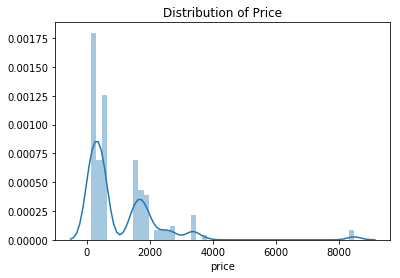

In [15]:
#sns.kdeplot(df['price'], shade=True)
sns.distplot(df['price']).set_title("Distribution of Price")

In [16]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Histogram, Layout
min_ = df['price'].min()
max_ = df['price'].max()

data = [Histogram(x=df['price'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of prices", bargap=0.2)
fig = Figure(data=data, layout=layout)


plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [17]:
df.columns

Index(['price', 'To_airport', 'From_airport', 'To_time', 'From_time', 'sort',
       'location', '#stops', 'Total_mins', 'carrier'],
      dtype='object')

In [18]:
df.groupby('location', as_index=False)

In [19]:
from plotly.graph_objs import Scatter

data = [Scatter(x=df['#stops'], y=df['price'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Number of Stops versus price")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

<Figure size 864x432 with 0 Axes>

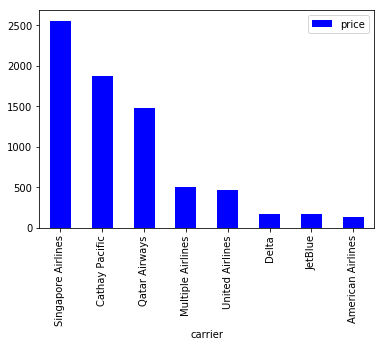

In [20]:
plt.figure(figsize=(12,6))
df[['price','carrier']].groupby('carrier').median().sort_values(ascending=False, by='price').plot(kind='bar', color='b')

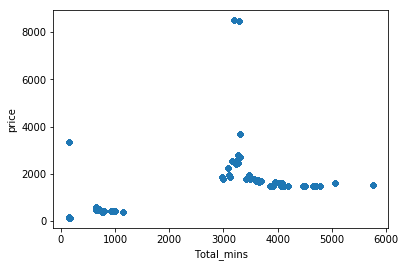

In [21]:
critic_df = df[['Total_mins', 'price']]
critic_df.plot.scatter('Total_mins', 'price')